<a href="https://colab.research.google.com/github/aninsung/Machine-Learning-Programming/blob/main/10%EC%A3%BC%EC%B0%A8/(rnn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# List the contents of the extracted directory to identify the correct path
extracted_path = "/content/human_activity_recognition"
for root, dirs, files in os.walk(extracted_path):
    print(root)
    print(dirs)
    print(files)
    print("-" * 20)

/content/human_activity_recognition
['__MACOSX', 'UCI HAR Dataset']
[]
--------------------
/content/human_activity_recognition/__MACOSX
['UCI HAR Dataset']
['._UCI HAR Dataset']
--------------------
/content/human_activity_recognition/__MACOSX/UCI HAR Dataset
['test', 'train']
['._README.txt', '._.DS_Store', '._features.txt', '._features_info.txt', '._train', '._activity_labels.txt', '._test']
--------------------
/content/human_activity_recognition/__MACOSX/UCI HAR Dataset/test
['Inertial Signals']
['._y_test.txt', '._Inertial Signals', '._subject_test.txt', '._X_test.txt']
--------------------
/content/human_activity_recognition/__MACOSX/UCI HAR Dataset/test/Inertial Signals
[]
['._total_acc_x_test.txt', '._body_acc_x_test.txt', '._body_acc_y_test.txt', '._body_acc_z_test.txt', '._body_gyro_z_test.txt', '._total_acc_y_test.txt', '._body_gyro_y_test.txt', '._total_acc_z_test.txt', '._body_gyro_x_test.txt']
--------------------
/content/human_activity_recognition/__MACOSX/UCI HAR Data

In [2]:
!pip install tensorflow

In [3]:
!unzip "/content/drive/MyDrive/UCI HAR Dataset.zip" -d /content/human_activity_recognition

Archive:  /content/drive/MyDrive/UCI HAR Dataset.zip
replace /content/human_activity_recognition/UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/human_activity_recognition/UCI HAR Dataset/.DS_Store  
  inflating: /content/human_activity_recognition/__MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: /content/human_activity_recognition/UCI HAR Dataset/activity_labels.txt  
  inflating: /content/human_activity_recognition/__MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: /content/human_activity_recognition/UCI HAR Dataset/features.txt  
  inflating: /content/human_activity_recognition/__MACOSX/UCI HAR Dataset/._features.txt  
  inflating: /content/human_activity_recognition/UCI HAR Dataset/features_info.txt  
  inflating: /content/human_activity_recognition/__MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: /content/human_activity_recognition/UCI HAR Dataset/README.txt  
  inflating: /content/human_activity_recognition/__MACOS

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, sep='\s+')
    return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = [
        'total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt',
        'body_acc_x_'+group+'.txt',  'body_acc_y_'+group+'.txt',  'body_acc_z_'+group+'.txt',
        'body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt'
    ]
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '/content/human_activity_recognition/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '/content/human_activity_recognition/UCI HAR Dataset/')

    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1

    # one-hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)

    print("Before scaling:", trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)

    # ===========================
    # 📏 StandardScaler 적용 부분
    # ===========================
    scaler = StandardScaler()

    # reshape to (samples*timesteps, features)
    n_samples_train, n_timesteps, n_features = trainX.shape
    n_samples_test = testX.shape[0]

    trainX_reshaped = trainX.reshape(-1, n_features)
    testX_reshaped = testX.reshape(-1, n_features)

    # fit scaler on training data only
    scaler.fit(trainX_reshaped)

    # transform both train and test
    trainX_scaled = scaler.transform(trainX_reshaped).reshape(n_samples_train, n_timesteps, n_features)
    testX_scaled = scaler.transform(testX_reshaped).reshape(n_samples_test, n_timesteps, n_features)

    print("After scaling:", trainX_scaled.shape, testX_scaled.shape)
    # ===========================

    return trainX_scaled, trainy, trainy_one_hot, testX_scaled, testy, testy_one_hot


# 데이터 불러오기
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

from sklearn.model_selection import train_test_split

X_train, X_val, y_train_one_hot_split, y_val_one_hot_split = train_test_split(
    trainX, trainy_one_hot, test_size=0.2, random_state=100
)

# Keep the original trainy and testy for evaluation purposes
# y_train and y_val are not needed for model training with one-hot encoded labels

print("✅ 데이터셋 준비 완료")
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", testX.shape)

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2732011783.py:10: SyntaxWarning: invalid escape sequence '\s'
  dataframe = pd.read_csv(filepath, header=None, sep='\s+')
/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


Before scaling: (7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)
After scaling: (7352, 128, 9) (2947, 128, 9)
✅ 데이터셋 준비 완료
Train: (5881, 128, 9) Val: (1471, 128, 9) Test: (2947, 128, 9)


In [6]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# 기본 차원 정의
n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = y_train_one_hot_split.shape[1]

inputs = Input(shape=(n_timesteps, n_features))
x = SimpleRNN(128, return_sequences=True, activation='relu')(inputs)
x = SimpleRNN(64, return_sequences=True, activation='relu')(x)

# 시퀀스 전체의 평균 특징을 추출
x = GlobalAveragePooling1D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(n_outputs, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
model_history = model.fit(
    x=X_train, # Corrected to use a single input tensor
    y=y_train_one_hot_split,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val_one_hot_split) # Corrected validation data format
)

Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6524 - loss: 0.9037 - val_accuracy: 0.9293 - val_loss: 0.1727
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9303 - loss: 0.1817 - val_accuracy: 0.9429 - val_loss: 0.1414
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9537 - loss: 0.1350 - val_accuracy: 0.9443 - val_loss: 0.1256
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9470 - loss: 0.1395 - val_accuracy: 0.9531 - val_loss: 0.1120
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9565 - loss: 0.0989 - val_accuracy: 0.9531 - val_loss: 0.1050
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9509 - loss: 0.1096 - val_accuracy: 0.9463 - val_loss: 0.1135
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9515 - loss: 0.1115 - val_accuracy: 0.9497 - val_loss: 0.1055
Epoch 8/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9602 - loss: 0.0939 - val_accu

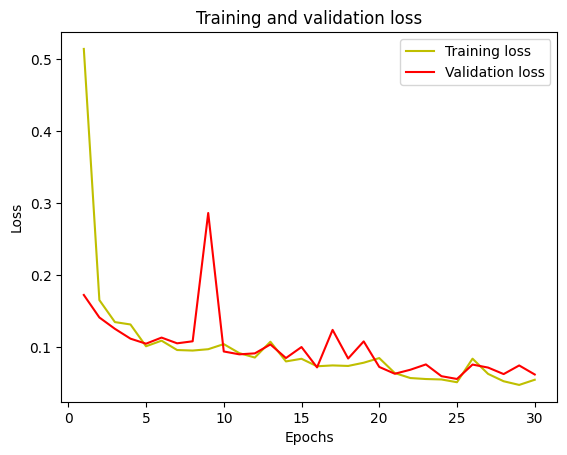

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

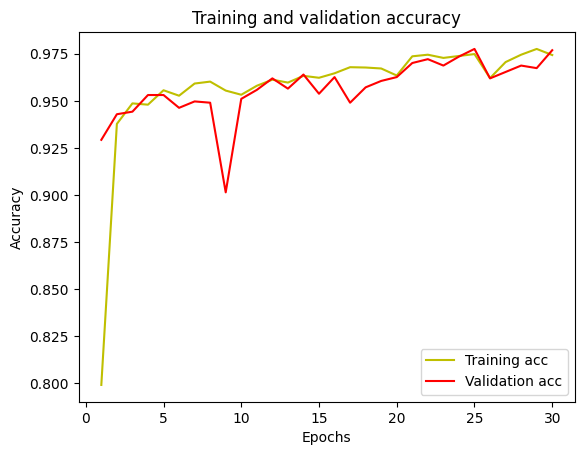

In [9]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
[[465   5  26   0   0   0]
 [  3 422  45   0   1   0]
 [  0   0 420   0   0   0]
 [  0   1   0 374 110   6]
 [  0   0   0  56 476   0]
 [  0   0   0   0   0 537]]
0.9141499830335935
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       496
           1       0.99      0.90      0.94       471
           2       0.86      1.00      0.92       420
           3       0.87      0.76      0.81       491
           4       0.81      0.89      0.85       532
           5       0.99      1.00      0.99       537

    accuracy                           0.91      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.91      0.91      2947



<Axes: >

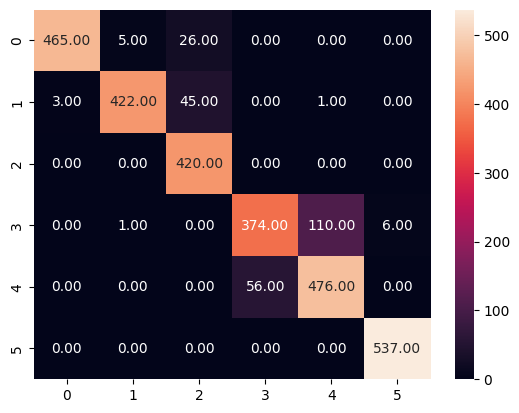

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=model.predict(testX) # Corrected to use a single input tensor
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')